Original DataFrame:
   Color Size  Price
0    Red    S     10
1   Blue    M     15
2  Green    L     10
3   Blue    S     12
4    Red    M     10
5  Green    L     20
6    Red    M     18

DataFrame with Categorical Encoding:
   Color Size  Color_Encoded  Size_Encoded
0    Red    S              2             2
1   Blue    M              0             1
2  Green    L              1             0
3   Blue    S              0             2
4    Red    M              2             1
5  Green    L              1             0
6    Red    M              2             1

DataFrame with One-Hot Encoding:
   Price  Color_Encoded  Size_Encoded  Color_Blue  Color_Green  Color_Red  \
0     10              2             2       False        False       True   
1     15              0             1        True        False      False   
2     10              1             0       False         True      False   
3     12              0             2        True        False      False   
4     10   

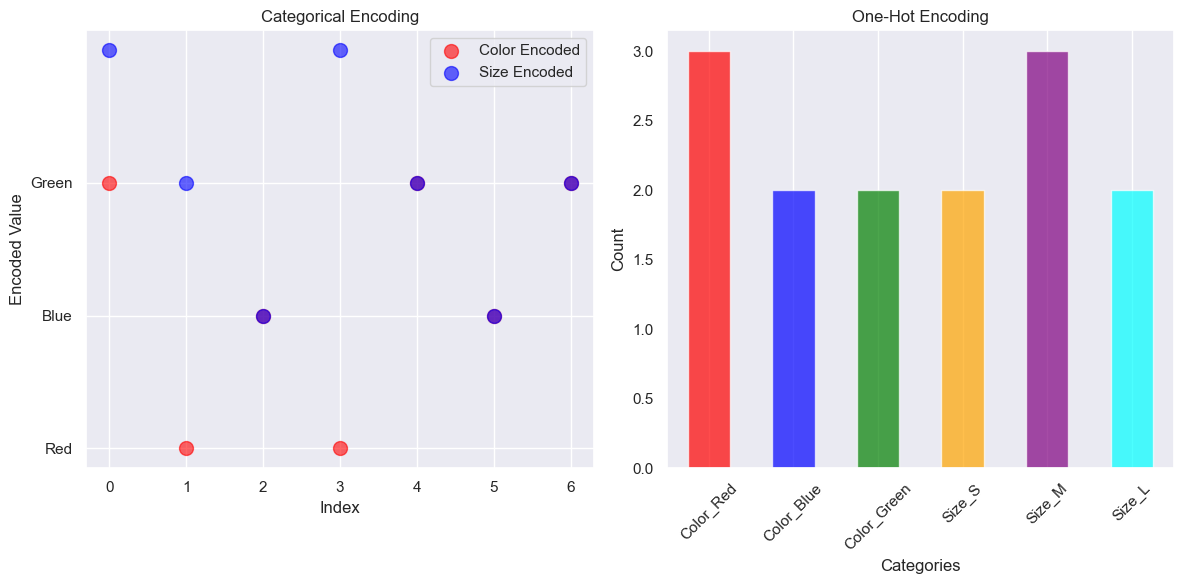

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M', 'L', 'M'],
    'Price': [10, 15, 10, 12, 10, 20, 18]
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

df['Color_Encoded'] = df['Color'].astype('category').cat.codes
df['Size_Encoded'] = df['Size'].astype('category').cat.codes

df_one_hot = pd.get_dummies(df, columns=['Color', 'Size'], prefix=['Color', 'Size'])

print("\nDataFrame with Categorical Encoding:")
print(df[['Color', 'Size', 'Color_Encoded', 'Size_Encoded']])

print("\nDataFrame with One-Hot Encoding:")
print(df_one_hot)

sns.set_style('darkgrid')  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df.index, df['Color_Encoded'], color='red', label='Color Encoded', alpha=0.6, s=100)
plt.scatter(df.index, df['Size_Encoded'] + 1, color='blue', label='Size Encoded', alpha=0.6, s=100) 
plt.title('Categorical Encoding')
plt.xlabel('Index')
plt.ylabel('Encoded Value')
plt.yticks(range(3), ['Red', 'Blue', 'Green'])
plt.legend()
plt.grid(True)

one_hot_sum = df_one_hot[['Color_Red', 'Color_Blue', 'Color_Green', 'Size_S', 'Size_M', 'Size_L']].sum()
plt.subplot(1, 2, 2)
one_hot_sum.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'cyan'], alpha=0.7)
plt.title('One-Hot Encoding')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
